Write about the benefits/impact of the solution - in what way does the business (client) benefit from the solution provided?
Problem Statement: -

Perform hierarchical and K-means clustering on the dataset. After that, perform PCA on the dataset and extract the first 3 principal components and make a new dataset with these 3 principal components as the columns. Now, on this new dataset, perform hierarchical and K-means clustering. Compare the results of clustering on the original dataset and clustering on the principal components dataset (use the scree plot technique to obtain the optimum number of clusters in K-means clustering and check if you’re getting similar results with and without PCA).


Business Objective:

The objective for this dataset could be to build a predictive model that classifies wines into different types based on their chemical properties. This model could help wine producers or distributors quickly and accurately categorize wines, ensuring quality control, consistency, and better marketing strategies.

Constraints:
Data Quality: Ensure that the dataset is clean, with no missing or erroneous values.

Model Accuracy: The model should be highly accurate in predicting wine types to avoid misclassification, which could lead to incorrect labeling and marketing.

Interpretability: Since the chemical properties of wine are highly specialized, it is crucial for the model to provide insights into which features contribute most to the classification.

Scalability: The model should handle large datasets in the future as more wine varieties and data points are collected.

In [1]:
import pandas as pd
df=pd.read_csv('wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [5]:
#count null values
df.isnull().sum()
#No null values

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [7]:
#checking for outliers
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<Axes: >

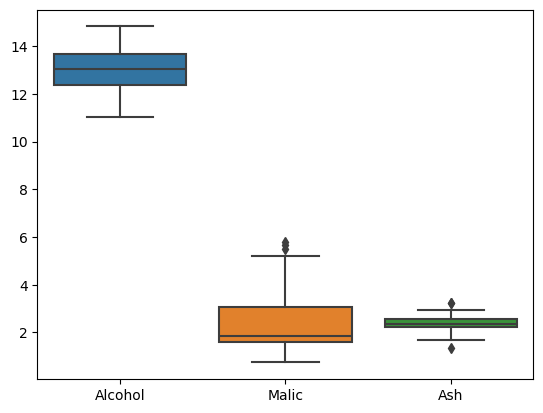

In [9]:
#Plotting boxplot
import seaborn as sns
sns.boxplot(df[['Alcohol', 'Malic', 'Ash']])

<Axes: >

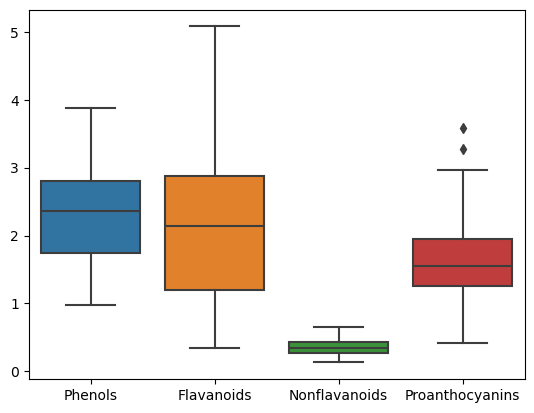

In [10]:
sns.boxplot(df[['Phenols','Flavanoids', 'Nonflavanoids', 'Proanthocyanins']])

<Axes: >

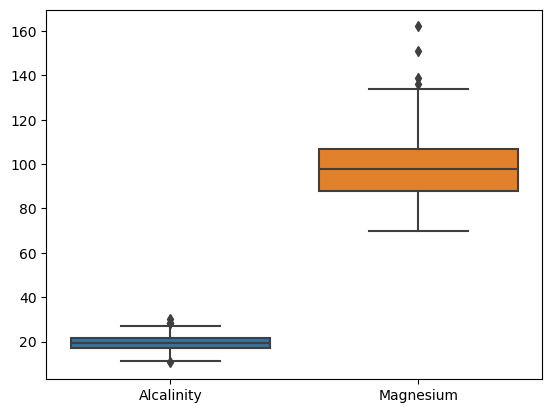

In [11]:
sns.boxplot(df[['Alcalinity', 'Magnesium']])

<Axes: >

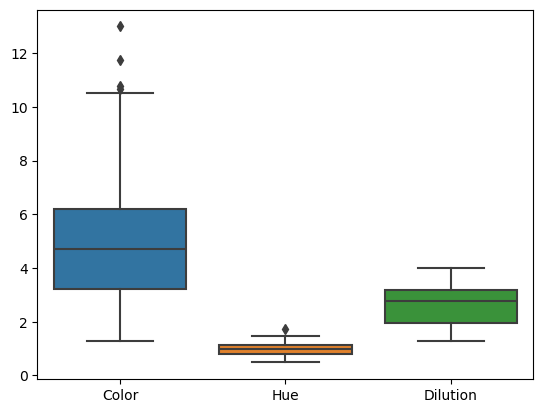

In [12]:
sns.boxplot(df[['Color', 'Hue', 'Dilution']])

<Axes: >

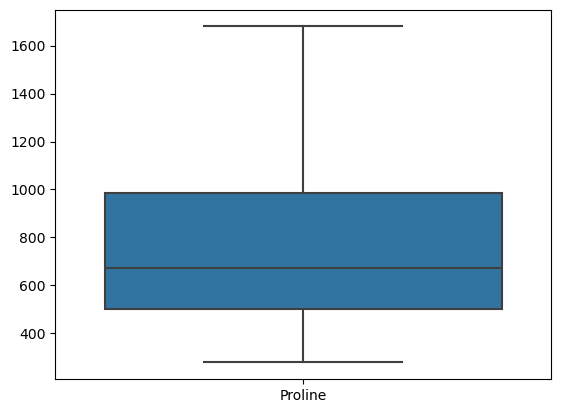

In [13]:
sns.boxplot(df[['Proline']])

In [14]:
outliers_columns=['Malic', 'Ash', 'Alcalinity', 'Magnesium','Proanthocyanins', 'Color', 'Hue']

In [15]:
import numpy as np
# Apply log transformation to the specified columns
for column in outliers_columns:
    # Adding a small constant to avoid issues with log(0)
    df[column] = np.log1p(df[column])

In [18]:
# Display the transformed data
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,0.996949,1.232560,2.809403,4.852030,2.80,3.06,0.28,1.190888,1.893112,0.712950,3.92,1065
1,1,13.20,1.022451,1.144223,2.501436,4.615121,2.65,2.76,0.26,0.824175,1.682688,0.717840,3.40,1050
2,1,13.16,1.211941,1.300192,2.975530,4.624973,2.80,3.24,0.30,1.337629,1.899118,0.708036,3.17,1185
3,1,14.37,1.081805,1.252763,2.879198,4.736198,3.85,3.49,0.24,1.156881,2.174752,0.620576,3.45,1480
4,1,13.24,1.278152,1.353255,3.091042,4.779123,2.80,2.69,0.39,1.036737,1.671473,0.712950,2.93,735


<Axes: >

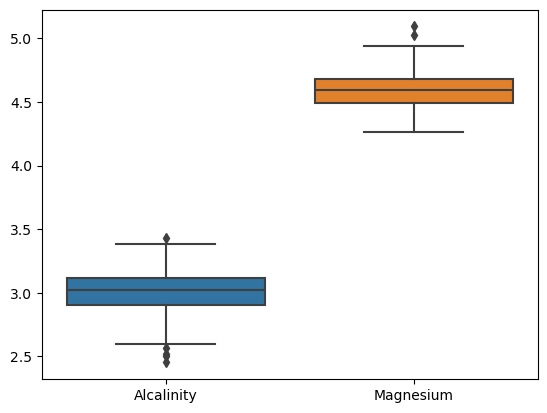

In [24]:
sns.boxplot(df[['Alcalinity', 'Magnesium']])

In [27]:
def remove_out(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        #Remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

df= remove_out(df,outliers_columns)

<Axes: >

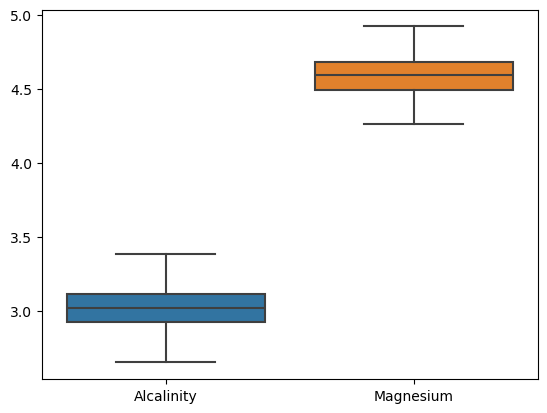

In [29]:
sns.boxplot(df[['Alcalinity', 'Magnesium']])

<Axes: >

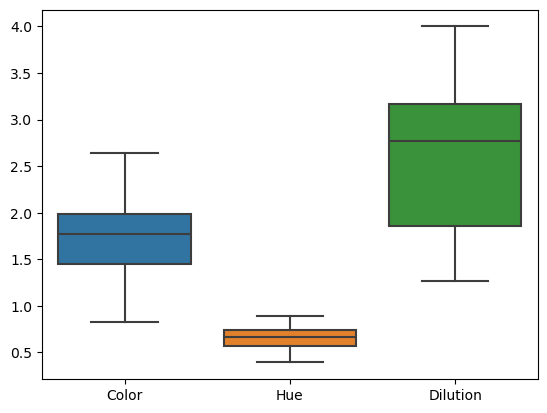

In [31]:
sns.boxplot(df[['Color', 'Hue', 'Dilution']])

<Axes: >

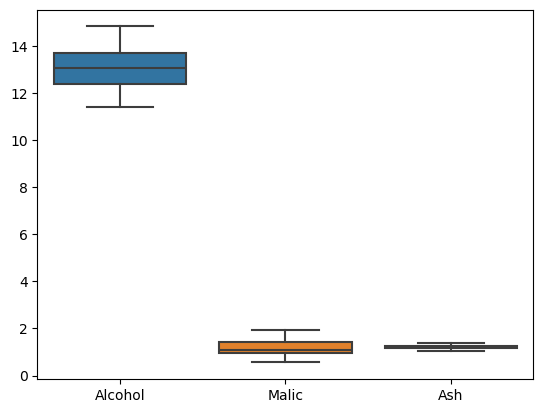

In [33]:
sns.boxplot(df[['Alcohol', 'Malic', 'Ash']])

In [35]:
#normalize the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)

In [36]:
df_scaled=pd.DataFrame(df_scaled, columns=df.columns)

<Axes: >

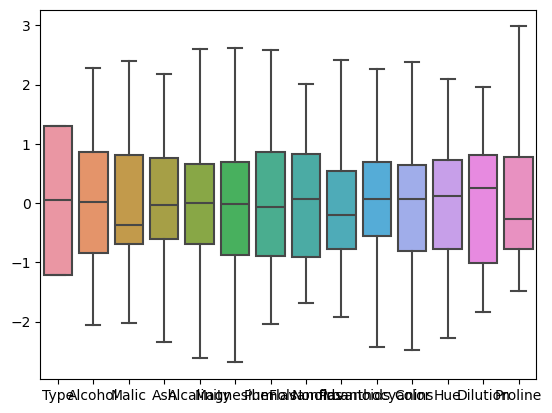

In [39]:
sns.boxplot(df_scaled)


Hierarchical clustering on normalized data

In [42]:
#perform clustering based on alcohol content
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

In [44]:
#hierarchical clustering
Clust=AgglomerativeClustering(n_clusters=3)
y_clust=Clust.fit_predict(df_scaled)

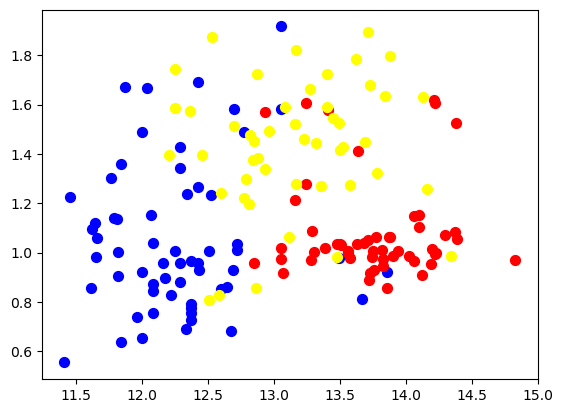

In [46]:
#create dataframes for different clusters
df_cluster1=df[y_clust==0]
df_cluster2=df[y_clust==1]
df_cluster3=df[y_clust==2]

plt.scatter(df_cluster1['Alcohol'], df_cluster1['Malic'], s=50, c='blue', label='Cluster 1')
plt.scatter(df_cluster2['Alcohol'], df_cluster2['Malic'], s=50, c='red', label='Cluster 2')
plt.scatter(df_cluster3['Alcohol'], df_cluster3['Malic'], s=50, c='yellow', label='Cluster 3')

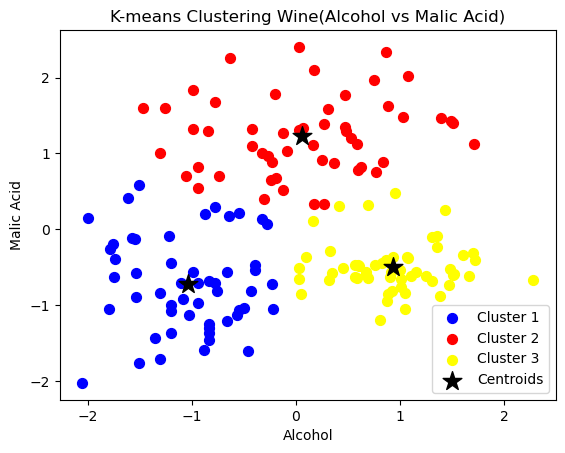

In [48]:
# Perform K-means clustering based on alcohol and malic acid
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(df_scaled[['Alcohol', 'Malic']])

# Get cluster centers (centroids)
centroids = kmeans.cluster_centers_

# Create dataframes for different clusters
df_cluster1 = df_scaled[y_kmeans == 0]
df_cluster2 = df_scaled[y_kmeans == 1]
df_cluster3 = df_scaled[y_kmeans == 2]

# Plot the clusters and centroids
plt.scatter(df_cluster1['Alcohol'], df_cluster1['Malic'], s=50, c='blue', label='Cluster 1')
plt.scatter(df_cluster2['Alcohol'], df_cluster2['Malic'], s=50, c='red', label='Cluster 2')
plt.scatter(df_cluster3['Alcohol'], df_cluster3['Malic'], s=50, c='yellow', label='Cluster 3')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='black', label='Centroids')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('K-means Clustering Wine(Alcohol vs Malic Acid)')
plt.legend()
plt.show()

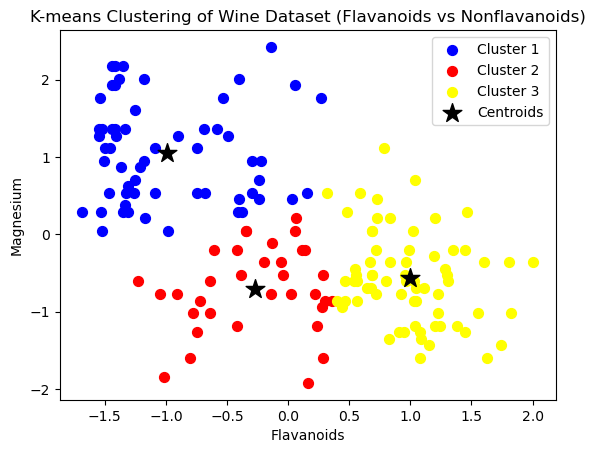

In [50]:
# Perform K-means clustering based on alcohol and malic acid
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(df_scaled[['Flavanoids', 'Nonflavanoids']])

# Get cluster centers (centroids)
centroids = kmeans.cluster_centers_

# Create dataframes for different clusters
df_cluster1 = df_scaled[y_kmeans == 0]
df_cluster2 = df_scaled[y_kmeans == 1]
df_cluster3 = df_scaled[y_kmeans == 2]

# Plot the clusters and centroids
plt.scatter(df_cluster1['Flavanoids'], df_cluster1['Nonflavanoids'], s=50, c='blue', label='Cluster 1')
plt.scatter(df_cluster2['Flavanoids'], df_cluster2['Nonflavanoids'], s=50, c='red', label='Cluster 2')
plt.scatter(df_cluster3['Flavanoids'], df_cluster3['Nonflavanoids'], s=50, c='yellow', label='Cluster 3')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='black', label='Centroids')
plt.xlabel('Flavanoids')
plt.ylabel('Magnesium')
plt.title('K-means Clustering of Wine Dataset (Flavanoids vs Nonflavanoids)')
plt.legend()
plt.show()

In [52]:
from sklearn.metrics import davies_bouldin_score

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(df_scaled, y_kmeans)
print(f'Davies-Bouldin Index: {db_index}')


Davies-Bouldin Index: 2.08954275133982


In [54]:
#calculate silhoutte score average
from sklearn.metrics import silhouette_score
sil_score=silhouette_score(df_scaled, y_kmeans)
print(sil_score)

0.1919085746911395


Principal Component Analysis

In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(df_scaled)
# Create a new DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
# Print the explained variance ratio for each component
print('Explained Variance Ratio:', pca.explained_variance_ratio_)
     

Explained Variance Ratio: [0.41922353 0.1962953  0.08763326]


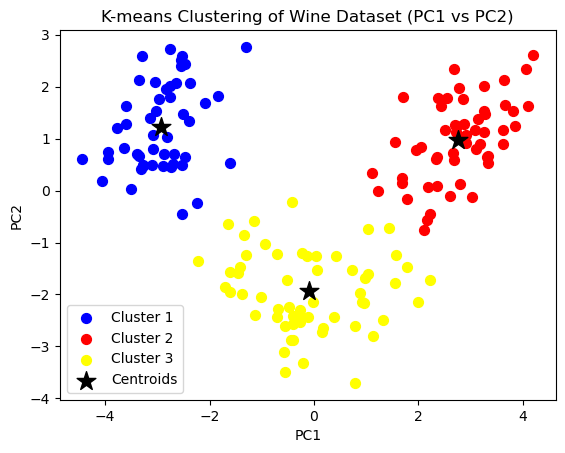

In [59]:
#perform kmeans clustering on PC1 and PC2
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(principal_df[['PC1', 'PC2']])
# Get cluster centers (centroids)
centroids = kmeans.cluster_centers_
# Create dataframes for different clusters
df_cluster1 = principal_df[y_kmeans == 0]
df_cluster2 = principal_df[y_kmeans == 1]
df_cluster3 = principal_df[y_kmeans == 2]
# Plot the clusters and centroids
plt.scatter(df_cluster1['PC1'], df_cluster1['PC2'], s=50, c='blue', label='Cluster 1')
plt.scatter(df_cluster2['PC1'], df_cluster2['PC2'], s=50, c='red', label='Cluster 2')
plt.scatter(df_cluster3['PC1'], df_cluster3['PC2'], s=50, c='yellow', label='Cluster 3')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='black', label='Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering of Wine Dataset (PC1 vs PC2)')
plt.legend()
plt.show()

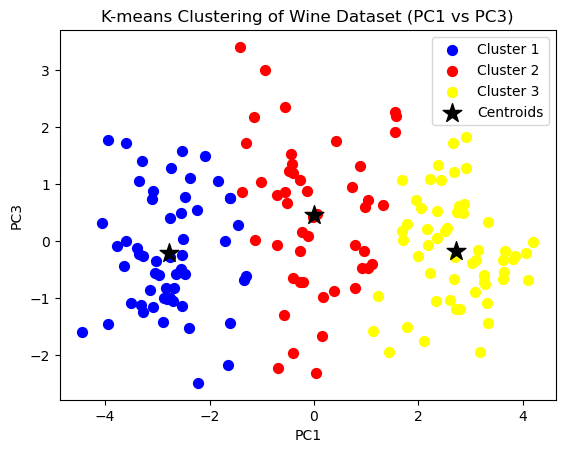

In [61]:
#perform kmeans clustering on PC1 and PC3
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(principal_df[['PC1', 'PC3']])
# Get cluster centers (centroids)
centroids = kmeans.cluster_centers_
# Create dataframes for different clusters
df_cluster1 = principal_df[y_kmeans == 0]
df_cluster2 = principal_df[y_kmeans == 1]
df_cluster3 = principal_df[y_kmeans == 2]
# Plot the clusters and centroids
plt.scatter(df_cluster1['PC1'], df_cluster1['PC3'], s=50, c='blue', label='Cluster 1')
plt.scatter(df_cluster2['PC1'], df_cluster2['PC3'], s=50, c='red', label='Cluster 2')
plt.scatter(df_cluster3['PC1'], df_cluster3['PC3'], s=50, c='yellow', label='Cluster 3')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='black', label='Centroids')
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.title('K-means Clustering of Wine Dataset (PC1 vs PC3)')
plt.legend()
plt.show()

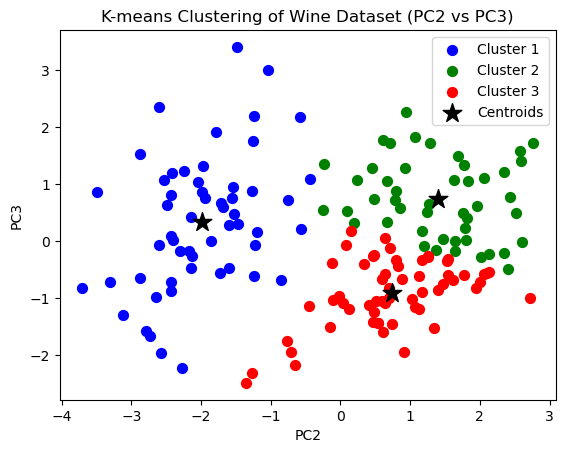

In [63]:
#perform kmeans clustering on PC2 and PC3
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(principal_df[['PC2', 'PC3']])
# Get cluster centers (centroids)
centroids = kmeans.cluster_centers_
# Create dataframes for different clusters
df_cluster1 = principal_df[y_kmeans == 0]
df_cluster2 = principal_df[y_kmeans == 1]
df_cluster3 = principal_df[y_kmeans == 2]
# Plot the clusters and centroids
plt.scatter(df_cluster1['PC2'], df_cluster1['PC3'], s=50, c='blue', label='Cluster 1')
plt.scatter(df_cluster2['PC2'], df_cluster2['PC3'], s=50, c='green', label='Cluster 2')
plt.scatter(df_cluster3['PC2'], df_cluster3['PC3'], s=50, c='red', label='Cluster 3')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='black', label='Centroids')
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.title('K-means Clustering of Wine Dataset (PC2 vs PC3)')
plt.legend()
plt.show()

In [65]:

#calculate silhoutte score average
from sklearn.metrics import silhouette_score
sil_score=silhouette_score(principal_df, y_kmeans)
print(sil_score)

0.20841566575318535


In [67]:
from sklearn.metrics import davies_bouldin_score

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(df_scaled, y_kmeans)
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 3.349590162243596
